## Completion prediction

### Load data

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
import visuals as vs
from sklearn.preprocessing import LabelEncoder

# Pretty display for notebooks
import matplotlib.pyplot as plt
%matplotlib inline

# Load the dataset and print the first 5 rows
df = pd.read_csv('hmx_intended.csv')

df.head()

,course_id,user_id,viewed,explored,certified,country,education,gender,grade,time_registered,...,semester,age,course_launch,course_wrap,course_duration,before_launch,lifetime_proportion,course_chapters,chapters_proportion,certification_rate
0,HarvardX/CS50x/2012,MHxPC130223941,1,0,0,Other Middle East/Central Asia,Secondary,m,0.0,2012-07-24,...,2012_Fall,20.0,2012-10-15,2013-04-15,182,1,150.000000,12.0,33.333333,4.725182
1,HarvardX/CS50x/2012,MHxPC130235150,1,1,0,India,Bachelor's,m,0.0,2012-07-24,...,2012_Fall,22.0,2012-10-15,2013-04-15,182,1,90.109890,12.0,100.000000,4.725182
2,HarvardX/CS50x/2012,MHxPC130069875,1,1,0,India,Secondary,m,0.0,2013-02-12,...,2012_Fall,19.0,2012-10-15,2013-04-15,182,0,101.648352,12.0,100.000000,4.725182
3,HarvardX/CS50x/2012,MHxPC130320562,1,1,1,Other Europe,Master's,m,1.0,2012-07-24,...,2012_Fall,29.0,2012-10-15,2013-04-15,182,1,111.538462,12.0,100.000000,4.725182
4,HarvardX/CS50x/2012,MHxPC130021254,1,0,0,Other South Asia,Bachelor's,m,0.0,2012-07-24,...,2012_Fall,26.0,2012-10-15,2013-04-15,182,1,159.340659,12.0,16.666667,4.725182


In [2]:
# size of the dataset
df.shape

(101405, 28)

In [3]:
# basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101405 entries, 0 to 101404
Data columns (total 28 columns):
course_id              101405 non-null object
user_id                101405 non-null object
viewed                 101405 non-null int64
explored               101405 non-null int64
certified              101405 non-null int64
country                101405 non-null object
education              101405 non-null object
gender                 101405 non-null object
grade                  101405 non-null float64
time_registered        101405 non-null object
last_event             101405 non-null object
nevents                101405 non-null float64
ndays_act              101405 non-null float64
nplay_video            101405 non-null float64
nchapters              101405 non-null float64
nforum_posts           101405 non-null int64
institution            101405 non-null object
course_code            101405 non-null object
semester               101405 non-null object
age           

In [4]:
# statistical description
df.describe()

,viewed,explored,certified,grade,nevents,ndays_act,nplay_video,nchapters,nforum_posts,age,course_duration,before_launch,lifetime_proportion,course_chapters,chapters_proportion,certification_rate
count,101405.000000,101405.000000,101405.000000,101405.000000,101405.000000,101405.000000,101405.000000,101405.000000,101405.000000,101405.000000,101405.000000,101405.000000,101405.000000,101405.000000,101405.000000,101405.000000
mean,0.998886,0.281860,0.134737,0.149664,1256.961442,13.847079,137.844337,7.033223,0.044909,27.028016,128.201509,0.428904,90.116220,17.840777,39.691436,13.473695
std,0.033363,0.449908,0.341444,0.290986,2361.621134,17.826211,408.178392,5.989315,0.294143,8.840327,33.339898,0.494922,55.968120,6.617799,28.586326,7.565181
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,10.000000,71.000000,0.000000,13.013699,11.000000,13.636364,4.725182
25%,1.000000,0.000000,0.000000,0.000000,69.000000,3.000000,0.000000,3.000000,0.000000,21.000000,107.000000,0.000000,43.243243,12.000000,16.666667,7.894954
50%,1.000000,0.000000,0.000000,0.000000,316.000000,7.000000,13.000000,5.000000,0.000000,25.000000,120.000000,0.000000,87.912088,18.000000,25.000000,11.837547
75%,1.000000,1.000000,0.000000,0.090000,1246.000000,17.000000,105.000000,10.000000,0.000000,30.000000,146.000000,1.000000,118.493151,19.000000,57.142857,20.378645
max,1.000000,1.000000,1.000000,1.000000,53180.000000,205.000000,34596.000000,47.000000,6.000000,78.000000,182.000000,1.000000,339.795918,47.000000,100.000000,29.153120


In [5]:
# check missing values
df.isna().sum().sum()

0

In [6]:
# check duplicates
df.duplicated().sum()

0

### Feature selection


In [7]:
df.columns

Index(['course_id', 'user_id', 'viewed', 'explored', 'certified', 'country',
       'education', 'gender', 'grade', 'time_registered', 'last_event',
       'nevents', 'ndays_act', 'nplay_video', 'nchapters', 'nforum_posts',
       'institution', 'course_code', 'semester', 'age', 'course_launch',
       'course_wrap', 'course_duration', 'before_launch',
       'lifetime_proportion', 'course_chapters', 'chapters_proportion',
       'certification_rate'],
      dtype='object')

In [8]:
# select the features we are going to use to fit the model

to_keep = ['course_id', 'explored', 'certified', 'country','education', 'gender','nevents', 'ndays_act', 
           'nplay_video', 'nchapters', 'nforum_posts','institution', 'course_code', 'semester', 'age', 
           'course_duration', 'before_launch', 'lifetime_proportion', 'course_chapters', 'chapters_proportion']
data = df[to_keep]
data.head(1)

,course_id,explored,certified,country,education,gender,nevents,ndays_act,nplay_video,nchapters,nforum_posts,institution,course_code,semester,age,course_duration,before_launch,lifetime_proportion,course_chapters,chapters_proportion
0,HarvardX/CS50x/2012,0,0,Other Middle East/Central Asia,Secondary,m,25.0,2.0,0.0,4.0,0,HarvardX,CS50x,2012_Fall,20.0,182,1,150.0,12.0,33.333333


### Catagorical variables encoding

We need to convert the values of catagorical variables from string to number. 

In [9]:
data = data.apply(LabelEncoder().fit_transform)
data.head()

,course_id,explored,certified,country,education,gender,nevents,ndays_act,nplay_video,nchapters,nforum_posts,institution,course_code,semester,age,course_duration,before_launch,lifetime_proportion,course_chapters,chapters_proportion
0,1,0,0,19,4,1,24,1,0,2,0,0,9,0,10,10,1,1548,1,42
1,1,1,0,10,0,1,7,0,0,10,0,0,9,0,12,10,1,914,1,175
2,1,1,0,10,4,1,244,9,0,10,0,0,9,0,9,10,0,1046,1,175
3,1,1,1,18,3,1,690,58,0,10,0,0,9,0,19,10,1,1161,1,175
4,1,0,0,23,0,1,0,0,0,0,0,0,9,0,16,10,1,1630,1,7


### Getting features and target variable

In [10]:
y = data['certified'].values.reshape(-1, 1)
feature_names = data.drop('certified', axis=1).columns
X = data.drop('certified', axis=1).values

### Preprocessing


In [11]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)

X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [12]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [13]:
X.shape, y.shape

((101405, 19), (101405, 1))

### Split Data into training dataset and test dataset

- The [train_test_split function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)from sklearn.model_selection module split arrays or matrices into random train and test subsets. 
- When the 'shuffle' parameter is set to True, the data will be shuffled before splitting.
- In this case, we set the test size to be 0.2
- If we do not set the random_state parameter, every iteration, the training set and test set would be different with another iteration, this will somewhat reduce the random variance when selecting the training and test set. For now we will set the random_state, for the statistical test we will not set the random_state

In [14]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 81124 samples.
Testing set has 20281 samples.


In [15]:
y_train = y_train.ravel()
y_test = y_test.ravel()

### Model selection

Since our target is labeled(1 for certified 0 for not certified), this is a supervised learning problem. And what we are predicting is a binary variable, so we could use classfiers, specifically. Below we will selection a few possible classifiers to implement.

In [16]:
# let n be the number of features, m be the number of training examples
n = X_train.shape[1]
m = X_train.shape[0]
print('The training dataset has {} features and {} examples'.format(n, m))

The training dataset has 19 features and 81124 examples


As indicated in the machine learning map in sklearn, if our training examples are not too large(>100,000), then the classifiers we could choose would be SVM, KNN, Naive Bayes and Ensemble Methods. Considering that KNN is a lazy learner, although it is sample, it could be very slow, takes a lot of memory. So after selection, we decided to try these classifiers below:

Logistic Regression

- Real-world application in industry: Online transaction fraud detection
- Strenghth: Outputs have a nice probabilistic interpretation, and the algorithm can be regularized to avoid overfitting. Logistic models can be updated easily with new data using stochastic gradient descent.
- Weakness: Logistic regression tends to underperform when there are multiple or non-linear decision boundaries. They are not flexible enough to naturally capture more complex relationships
- Reason of choosing this model for our data: in our case our m(number of training examples) is large(m=322,200), while n(number of features) is small(n=50).

Random Forest


- Real-world application in industry: Cancer detection
- Strenghth: One decison tree model tends to overfit, the strong point of Random forest is that it is a collection of lots of decisin tree models, let each dicision tree model vote and pick up the best model.
- Weakness: Random forests are much harder and time-consuming to construct due the complexity, and they also require more computational resources and are also less intuitive
- Reason of choosing this model for our data: Firstly it's a ensemble method, which could effectively prevent overfitting, also since it derives from decision tree models, it could automatically select features



Support Vector Machines

- Real-world application in industry: Handwriting recognition
- Strenghth: It works really well in complicated domains where there is a clear margin of separation.
- Weakness: Does not perform well in very large dataset, does not perform well with lots of noise, could be very slow
- Reason of choosing this model for our data: SVM is firstly recommended in the map, although it indicates a linear kernel, to the best of my understanding, a linear kernel applies to conditions when the number of features(n) is large, compared with the number of training example(m), in our case, n is small, m is large, we would use SVM with a linear kernel, as advised by Andrew Ng in his Machine Learning course.  


Reference

- [Sklearn machine learning map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)
- [Stanford Machine Learning by Andrew Ng](https://www.coursera.org/learn/machine-learning/lecture/sKQoJ/using-an-svm)
- [Which machine learning classifier to choose, in general?](https://stackoverflow.com/questions/2595176/which-machine-learning-classifier-to-choose-in-general)
- [Machine Learning Algorithms Comparison](https://medium.com/fintechexplained/machine-learning-algorithm-comparison-f14ce372b855)
- [Machine Learning Classifiers](https://towardsdatascience.com/machine-learning-classifiers-a5cc4e1b0623)
- [Real-Life Applications of SVM](https://data-flair.training/blogs/applications-of-svm/)
- [What are the advantages and disadvantages for a random forest algorithm?](https://www.quora.com/What-are-the-advantages-and-disadvantages-for-a-random-forest-algorithm)
- [An Introduction To Building a Classification Model Using Random Forests In Python](https://blogs.oracle.com/datascience/an-introduction-to-building-a-classification-model-using-random-forests-in-python)
- [Naive Bayes Strengths and Weaknesses](https://www.youtube.com/watch?v=nfbKTrufPOs)
- [SVM Strengths and Weaknesses](https://www.youtube.com/watch?v=U9-ZsbaaGAs)
- [Modern Machine Learning Algorithms: Strengths and Weaknesses](https://elitedatascience.com/machine-learning-algorithms)

### Naive Predictor
The first model will serve as a baseline in which we always predict a student is not certified. 
- Since we are always predicting negtive, the True positive and False positive are both 0. 
- False Negtive would be the 1s in the dataset that we predicted as 0, then the size of False Negtive should be the number of the 1s in our dataset.
- True negtive would be all the 0s in the dataset, and the size should be the number of zeros in the dataset.
- the precison in this case for those we predicted as certified, how many are really certified. In the naive model We are predicting 0 students are certified, and among these predicted certified 0 students, 0 are really certified, so the precision is some what 0/0 = 100%. 0/ 0 looks a little weird, but we could think it this way: we made no mistake in our prediction, so our precisoin is 100%.
- the recall would be for those actually certified, how many do we correctly predicted as certified. 
- For Fbeta score, since our goal is to identify those who will not be certified and provide intervention accordingly, so we would like to make sure for those our model predcit as certified, are certified. Otherwise we may let go a student who need intervention since we predict him as certified. That is to say, we want our Fbeta score to close to Precision. We can achieve this by setting beta to close to 0. We will try beta = 0.1 to see how well our model can predict.

In [17]:
y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [18]:
len(y)

101405

In [19]:
len(y) - np.sum(y)

87742.0

In [20]:
accuracy = (len(y) - np.sum(y)) / len(y)

In [21]:
TP = 0
FP = 0

In [22]:
FN = np.sum(y)
FN

13663.0

In [23]:
TN = len(y) - FN
TN

87742.0

In [24]:
accuracy = (TP+FN) / len(y)
accuracy

0.134736945909965

In [25]:
# both True positive(TP) and False positive(FP) are 0
TP = 0

FP = 0

# size of False Negtive (FN) is the number of 1s in the dataset
# size of True Negtive(TN) is the number of 0s in the dataset
FN = np.sum(y)
TN = len(y) - FN

# Calculate accuracy, precision and recall
beta = 0.1
accuracy = (len(y) - np.sum(y)) / len(y)
recall = TP / (TP + FN)
precision = 1

# calculate fbeta score with beta=0.1
fscore = (1 + beta**2)*precision*recall / (beta**2 * precision + recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.8653, F-score: 0.0000]


### Baseline 
- 82%-90% accuracy, according to paper _A Predictive Modeling System: Early identification of students at-risk enrolled in online learning programs_
- 89% accuracy, according to paper _MOOC Dropout Prediction Using Machine Learning Techniques: Review and Research Challenges_
- no fbeta score mentioned
- For now we all choose an average accuracy, which is 87% as the baseline.

### Implementation: Initial Model Evaluation

In [26]:
from sklearn.metrics import fbeta_score, accuracy_score
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:int(sample_size)], y_train[:int(sample_size)])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta = 0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta = 0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# TODO: Initialize the three models
clf_A = LogisticRegression(random_state=42, solver='lbfgs', max_iter=1000)
clf_B = RandomForestClassifier(random_state=42, n_estimators=100)
clf_C = SVC(random_state=4, gamma='auto')

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(X_train)
samples_10 = int(0.1 * (len(X_train)))
samples_1 = int(0.01 * (len(X_train)))

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)



LogisticRegression trained on 811 samples.
LogisticRegression trained on 8112 samples.
LogisticRegression trained on 81124 samples.
RandomForestClassifier trained on 811 samples.
RandomForestClassifier trained on 8112 samples.
RandomForestClassifier trained on 81124 samples.
SVC trained on 811 samples.
SVC trained on 8112 samples.
SVC trained on 81124 samples.


In [28]:
results

{'LogisticRegression': {0: {'train_time': 0.024651050567626953,
   'pred_time': 0.001971006393432617,
   'acc_train': 0.93,
   'acc_test': 0.9344213796163897,
   'f_train': 0.7880434782608696,
   'f_test': 0.7738923921054788},
  1: {'train_time': 0.11542987823486328,
   'pred_time': 0.0014309883117675781,
   'acc_train': 0.94,
   'acc_test': 0.9426556875893694,
   'f_train': 0.8163265306122449,
   'f_test': 0.7968786038287077},
  2: {'train_time': 0.9105479717254639,
   'pred_time': 0.0009288787841796875,
   'acc_train': 0.9366666666666666,
   'acc_test': 0.9423598441891425,
   'f_train': 0.7999999999999999,
   'f_test': 0.7952019621368899}},
 'RandomForestClassifier': {0: {'train_time': 0.15728092193603516,
   'pred_time': 0.19749665260314941,
   'acc_train': 1.0,
   'acc_test': 0.9414723139884621,
   'f_train': 1.0,
   'f_test': 0.7863127456068807},
  1: {'train_time': 0.9543118476867676,
   'pred_time': 0.32557010650634766,
   'acc_train': 1.0,
   'acc_test': 0.9518761402297717,
   

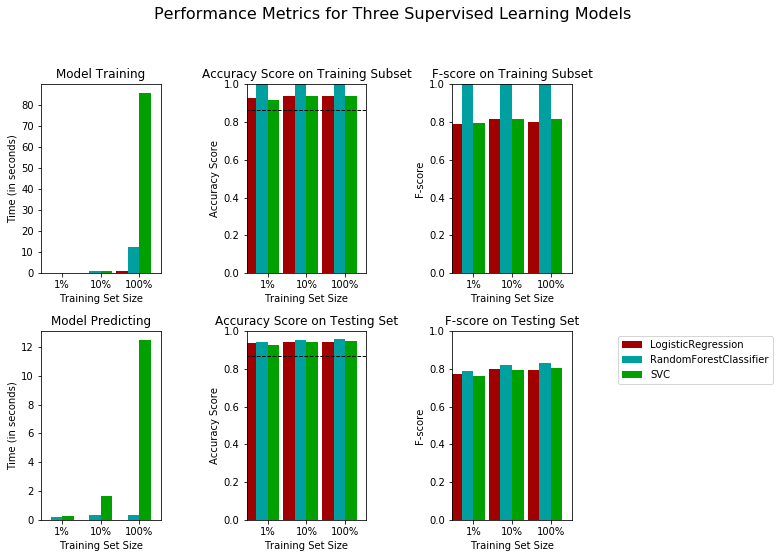

In [29]:
vs.evaluate(results, accuracy, fscore)

### Statistical test

We will do a statistical test to check whether there is a significant difference between 2 algorithms.

We will compare the logistic regression and random forest classifier in specific.

To reduce the training set random variance and the test set random variance, we will loop over 5 iterations of random splitted training set and test set


**null hypothesis**: the classification algorithms have the same error rate

**alternative hypothesis**: the classification algorithms have different error rate

e01 stands for Number of examples misclassified by A but not B

e10 stands for Number of examples misclassified by B but not A

McNemar’s test rejects the hypothesis that the two classification al- gorithms have the same error rate at 

significance level α if this value is greater than Xα2,1. For α = 0.05, X0.05**2,1 = 3.84.

**McNemar’s test from scratch**

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np
iterations = 5
clf_A = LogisticRegression(random_state=42, solver='lbfgs', max_iter=1000)
clf_B = RandomForestClassifier(random_state=42, n_estimators=100)
for i in range(iterations):
    print('Iteration {}: \n------'.format(i))
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2)
    y_train = y_train.ravel()
    y_test = y_test.ravel()
    y_pred_A = clf_A.fit(X_train, y_train).predict(X_test)
    y_pred_B = clf_B.fit(X_train, y_train).predict(X_test)
    
    error_ind_A = set(np.where(y_test != y_pred_A)[0])
    error_count_A = len(error_ind_A)
    error_ind_B = set(np.where(y_test != y_pred_B)[0])
    error_count_B = len(error_ind_B)
    error_both = error_ind_A
    error_both.intersection_update(error_ind_B)
    e00 = len(error_both)
    e10 = error_count_A - e00
    e01 = error_count_B - e00
    chi_squared = (abs(e01-e10) - 1)**2 / (e01+e10)
    print('Chi Squared value is {}'.format(chi_squared))

    

Iteration 0: 
------
Chi Squared value is 95.17146974063401
Iteration 1: 
------
Chi Squared value is 124.94192634560906
Iteration 2: 
------
Chi Squared value is 107.76544943820225
Iteration 3: 
------
Chi Squared value is 123.77185792349727
Iteration 4: 
------
Chi Squared value is 120.53324099722991


**McNemar’s test with statsmodels**

In [31]:
# LogisticRegression VS RandomForest
from statsmodels.stats.contingency_tables import mcnemar
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np

iterations = 5
clf_A = LogisticRegression(random_state=42, solver='lbfgs', max_iter=1000)
clf_B = RandomForestClassifier(random_state=42, n_estimators=100)
for i in range(iterations):
    print('Iteration {}: \n------'.format(i+1))
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2)
    y_train = y_train.ravel()
    y_test = y_test.ravel()
    y_pred_A = clf_A.fit(X_train, y_train).predict(X_test)
    y_pred_B = clf_B.fit(X_train, y_train).predict(X_test)
    
    
    
    error_ind_A = set(np.where(y_test != y_pred_A)[0])
    error_count_A = len(error_ind_A)
    error_ind_B = set(np.where(y_test != y_pred_B)[0])
    error_count_B = len(error_ind_B)
    error_both = error_ind_A
    error_both.intersection_update(error_ind_B)
    
    e00 = len(error_both)
    e10 = error_count_A - e00
    e01 = error_count_B - e00
    e11 = len(y_test) - e00 - e01 - e10
    
    table = [[e00, e01], [e10, e11]]
    p = mcnemar(table, exact=False, correction=True).pvalue
    print('P value is {}'.format(p))

    alpha = 0.05
    if p > alpha:
        print('Fail to reject H0, there is no significant difference between the performance of LogisticRegression and RandomForest classifiers\n')
    else:
        print('Reject H0, there is significant difference between the performance of LogisticRegression and RandomForest classifiers\n')

Iteration 1: 
------
P value is 3.504899503394417e-17
Reject H0, there is significant difference between the performance of LogisticRegression and RandomForest classifiers

Iteration 2: 
------
P value is 1.6193979886803482e-25
Reject H0, there is significant difference between the performance of LogisticRegression and RandomForest classifiers

Iteration 3: 
------
P value is 5.448761118581569e-23
Reject H0, there is significant difference between the performance of LogisticRegression and RandomForest classifiers

Iteration 4: 
------
P value is 1.078179611437386e-28
Reject H0, there is significant difference between the performance of LogisticRegression and RandomForest classifiers

Iteration 5: 
------
P value is 4.668137640136469e-27
Reject H0, there is significant difference between the performance of LogisticRegression and RandomForest classifiers



In [32]:
# SVM VS RandomForest
from statsmodels.stats.contingency_tables import mcnemar
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np

clf_A = SVC(random_state=4, gamma='auto')
clf_B = RandomForestClassifier(random_state=42, n_estimators=100)


iterations = 5
clf_A = LogisticRegression(solver='lbfgs', max_iter=1000)
clf_B = RandomForestClassifier(n_estimators=100)
for i in range(iterations):
    print('Iteration {}: \n------'.format(i+1))
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2)
    y_train = y_train.ravel()
    y_test = y_test.ravel()
    y_pred_A = clf_A.fit(X_train, y_train).predict(X_test)
    y_pred_B = clf_B.fit(X_train, y_train).predict(X_test)
    
    
    
    error_ind_A = set(np.where(y_test != y_pred_A)[0])
    error_count_A = len(error_ind_A)
    error_ind_B = set(np.where(y_test != y_pred_B)[0])
    error_count_B = len(error_ind_B)
    error_both = error_ind_A
    error_both.intersection_update(error_ind_B)
    
    e00 = len(error_both)
    e10 = error_count_A - e00
    e01 = error_count_B - e00
    e11 = len(y_test) - e00 - e01 - e10
    
    table = [[e00, e01], [e10, e11]]
    p = mcnemar(table, exact=False, correction=True).pvalue
    print('P value is {}'.format(p))

    alpha = 0.05
    if p > alpha:
        print('Fail to reject H0, there is no significant difference between the performance of LogisticRegression and RandomForest classifiers\n')
    else:
        print('Reject H0, there is significant difference between the performance of LogisticRegression and RandomForest classifiers\n')

Iteration 1: 
------
P value is 1.1982621267074549e-30
Reject H0, there is significant difference between the performance of LogisticRegression and RandomForest classifiers

Iteration 2: 
------
P value is 3.7807403899895586e-35
Reject H0, there is significant difference between the performance of LogisticRegression and RandomForest classifiers

Iteration 3: 
------
P value is 3.598131817345515e-25
Reject H0, there is significant difference between the performance of LogisticRegression and RandomForest classifiers

Iteration 4: 
------
P value is 7.873522340998159e-31
Reject H0, there is significant difference between the performance of LogisticRegression and RandomForest classifiers

Iteration 5: 
------
P value is 1.5103698566661497e-24
Reject H0, there is significant difference between the performance of LogisticRegression and RandomForest classifiers



### Random Forest

From above we can see that a random forest model perfoms better than the other two, we will tune a random forest model below

In [34]:
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import make_scorer
start = time()
clf = RandomForestClassifier(random_state=42)

# Number of trees in random forest
n_estimators = [100, 200, 300, 400, 500]

# The function to measure the quality of a split.
criterion = ['gini', 'entropy']

# Maximum number of levels in tree
max_depth = [2, 4, 6, 8, 10]

# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2', None]

parameters = {'n_estimators': n_estimators, 'criterion': criterion, 'max_depth': [2, 4, 6, 8, 10],
              'max_features': max_features}

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, param_grid = parameters, scoring=scorer, cv=5)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

end = time()
fit_pred_time = end - start

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print('\nTraining and predicting time: {}'.format(fit_pred_time))

/Library/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Unoptimized model
------
Accuracy score on testing data: 0.9537
F-score on testing data: 0.8408

Optimized Model
------
Final accuracy score on the testing data: 0.9549
Final F-score on the testing data: 0.8348

Training and predicting time: 27501.44800209999


In [35]:
# parameters of the best classifier
best_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

### Feature importance

In [36]:
from sklearn.ensemble import RandomForestClassifier

# Train the supervised model on the training set using .fit(X_train, y_train)
model = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42).fit(X_train, y_train)

# Extract the feature importances using .feature_importances_ 
feature_importances = model.feature_importances_

# index of feature importances

sorted_idx = feature_importances.argsort()

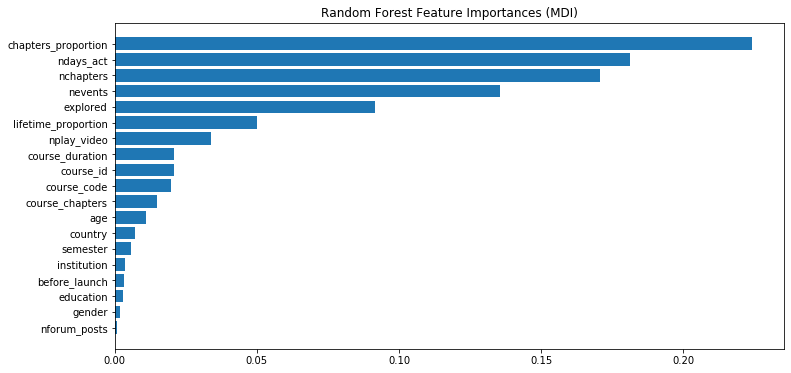

In [37]:
# plot of feature importance
y_ticks = np.arange(0, len(feature_names))
plt.figure(figsize=(12, 6))
plt.barh(y_ticks, feature_importances[sorted_idx])
plt.yticks(ticks=y_ticks, labels=feature_names[sorted_idx])
plt.title("Random Forest Feature Importances (MDI)")
plt.show()

### Referance
- [How to encode labels for multiple columns with Scikit-learn in Python](https://kite.com/python/answers/how-to-encode-labels-for-multiple-columns-with-scikit-learn-in-python)
- [Permutation Importance vs Random Forest Feature Importance (MDI)](https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html#)
- [Hyperparameter Tuning the Random Forest in Python](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)